# Data Mining Group 3
## Members: Moritz Brandl, Lukas Miklautz, Raphael Mitsch


In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import numpy as np

#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator
matplotlib.style.use('ggplot')
import seaborn as sns
from datetime import datetime
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

   
# import my method from the source code
%aimport data.download
from data.download import DatasetDownloader
%aimport visualization.visualize
from visualization.visualize import plot_track
from visualization.visualize import plot_gps_heatmap

%aimport data.preprocessing
from data.preprocessing import Preprocessor

# By loading the dotenv we can access Environment variables setted int the dm_mobility_task/.env file
# e.g. I setted there my token like this: "KEY_LUKAS"=1234, similary there is one for KEY_RAPHAEL and KEY_MORITZ
load_dotenv(find_dotenv())
DatasetDownloader.URL = str(os.environ.get("URL"))
DatasetDownloader.USERNAME = str(os.environ.get("LOGINNAME"))
DatasetDownloader.PASSWORD = str(os.environ.get("LOGINPASSWORD"))

In [2]:
recorded_file_names = DatasetDownloader.get_file_names(os.path.join(DatasetDownloader.get_data_dir(),"raw"))
print("We have recorded: {} trips".format(len(recorded_file_names)))

We have recorded: 80 trips


In [3]:
all_tokens = [os.environ.get("KEY_RAPHAEL"),
              os.environ.get("KEY_MORITZ"),
              os.environ.get("KEY_LUKAS")]

print("scripted trips:")
dfs = Preprocessor.preprocess(all_tokens)

scripted trips:
{'WALK': 5, 'TRAM': 4, 'METRO': 5}
{'WALK': 5, 'TRAM': 4, 'METRO': 4}
{'WALK': 5, 'TRAM': 5, 'METRO': 6}


Get summaries for each scripted trip:

In [4]:
token = os.environ.get("KEY_LUKAS")
trip_info = Preprocessor.get_trip_summaries(dfs[token]["trips"], convert_time=True)

scripted_mask = [True if "scripted" in str(notes).lower() else False for notes in trip_info["notes"]]
trip_info[scripted_mask]

,time,mode,notes,Start,Stop,trip_length
3,2017-11-28 15:40:17.340,WALK,scripted,2017-11-28 15:40:17.456,2017-11-28 15:51:24.672,00:11:07.216000
8,2017-12-06 09:51:23.220,WALK,scripted,2017-12-06 09:51:23.472,2017-12-06 10:02:20.832,00:10:57.360000
11,2017-12-06 14:09:08.037,WALK,scripted,2017-12-06 14:09:08.172,2017-12-06 14:21:13.838,00:12:05.666000
15,2017-12-11 13:35:33.698,WALK,scripted,2017-12-11 13:35:33.980,2017-12-11 13:46:38.741,00:11:04.761000
16,2017-12-11 13:55:58.520,TRAM,scripted,2017-12-11 13:55:58.654,2017-12-11 14:06:01.795,00:10:03.141000
17,2017-12-11 18:57:55.801,METRO,scripted u2mq,2017-12-11 18:57:55.978,2017-12-11 19:09:41.231,00:11:45.253000
18,2017-12-12 13:03:18.528,WALK,scripted,2017-12-12 13:03:18.719,2017-12-12 13:14:34.836,00:11:16.117000
19,2017-12-12 18:58:13.730,TRAM,scripted,2017-12-12 18:58:13.946,2017-12-12 19:10:07.787,00:11:53.841000
20,2017-12-12 19:10:34.071,TRAM,scripted,2017-12-12 19:10:34.242,2017-12-12 19:22:17.792,00:11:43.550000
21,2017-12-12 19:22:35.014,TRAM,scripted,2017-12-12 19:22:35.144,2017-12-12 19:32:40.312,00:10:05.168000


## Plot acceleration for one trip

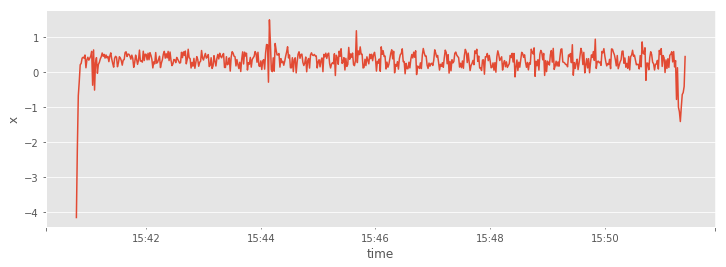

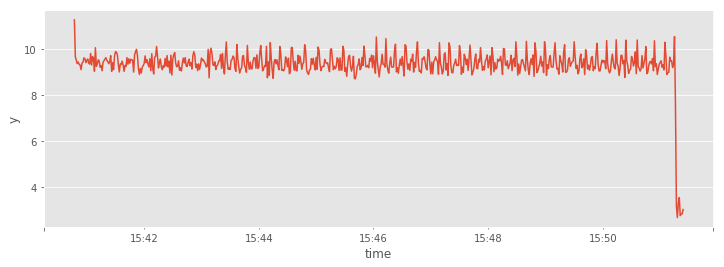

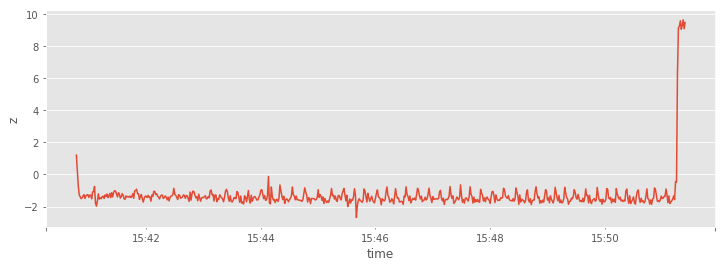

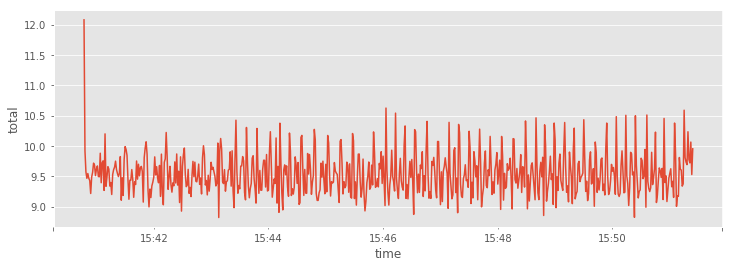

In [5]:
trip_nr = 3
sensor_for_one_trip = dfs[token]["resampled_sensor_data"][trip_nr]
acceleration = sensor_for_one_trip[sensor_for_one_trip["sensor"] == "acceleration"]
acceleration= acceleration.set_index("time")
figsize=(12, 4)
acceleration["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

acceleration["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

acceleration["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();

acceleration["total"].plot(figsize=figsize);
plt.ylabel("total")
plt.show();

## Plot the gps data on a google map and save it as html to disk:

In [6]:
trip1_lukas_uni = 1
location_df = dfs[token]["trips"][trip1_lukas_uni]["location"]
file_name = "gps_test.html"
plot_track(location_df[["longitude", "latitude"]], file_name)

The track can now be viewed at:


In [7]:
os.path.join("reports","maps",file_name)

'reports\\maps\\gps_test.html'

In [8]:
all_trips = []
for token in all_tokens:
    all_trips += dfs[token]["trips"]

file_name="heatmap.html"
plot_gps_heatmap(all_trips, file_name)

The heatmap can now be viewed at:

In [9]:
os.path.join("reports","maps",file_name)

'reports\\maps\\heatmap.html'